# Thoracic Surgery Data Data Set

This is an imbalanced dataset that I found on the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data#) that looks interesting.

The following data set information is copied directly from the [repository](https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data#). The main purpose of this is to predict whether or not a patient will recover after undergoing major lung resections to deal with lung cancer.

## Data Set Information

The data was collected retrospectively at Wroclaw Thoracic Surgery Centre for patients who underwent major lung resections for primary lung cancer in the years 2007â€“2011. The Centre is associated with the Department of Thoracic Surgery of the Medical University of Wroclaw and Lower-Silesian Centre for Pulmonary Diseases, Poland, while the research database constitutes a part of the National Lung Cancer Registry, administered by the Institute of Tuberculosis and Pulmonary Diseases in Warsaw, Poland.

### Attribute Information:

1. DGN: Diagnosis - specific combination of ICD-10 codes for primary and secondary as well multiple tumours if any (DGN3,DGN2,DGN4,DGN6,DGN5,DGN8,DGN1)
2. PRE4: Forced vital capacity - FVC (numeric)
3. PRE5: Volume that has been exhaled at the end of the first second of forced expiration - FEV1 (numeric)
4. PRE6: Performance status - Zubrod scale (PRZ2,PRZ1,PRZ0)
5. PRE7: Pain before surgery (T,F)
6. PRE8: Haemoptysis before surgery (T,F)
7. PRE9: Dyspnoea before surgery (T,F)
8. PRE10: Cough before surgery (T,F)
9. PRE11: Weakness before surgery (T,F)
10. PRE14: T in clinical TNM - size of the original tumour, from OC11 (smallest) to OC14 (largest) (OC11,OC14,OC12,OC13)
11. PRE17: Type 2 DM - diabetes mellitus (T,F)
12. PRE19: MI up to 6 months (T,F)
13. PRE25: PAD - peripheral arterial diseases (T,F)
14. PRE30: Smoking (T,F)
15. PRE32: Asthma (T,F)
16. AGE: Age at surgery (numeric)
17. Risk1Y: 1 year survival period - (T)rue value if died (T,F)

#### Class Distribution: the class value (Risk1Y) is binary valued.
**Risk1Y Value: Number of Instances:
T 70
N 400**

#### Summary Statistics:

Binary Attributes Distribution:
PRE7 Value: Number of Instances:
T 31
N 439
PRE8 Value: Number of Instances:
T 68
N 402
PRE9 Value: Number of Instances:
T 31
N 439
PRE10 Value: Number of Instances:
T 323
N 147
PRE11 Value: Number of Instances:
T 78
N 392
PRE17 Value: Number of Instances:
T 35
N 435
PRE19 Value: Number of Instances:
T 2
N 468
PRE25 Value: Number of Instances:
T 8
N 462
PRE30 Value: Number of Instances:
T 386
N 84
PRE32 Value: Number of Instances:
T 368
N 2

#### Nominal Attributes Distribution:
DGN Value: Number of Instances:
DGN3 349
DGN2 52
DGN4 47
DGN6 4
DGN5 15
DGN8 2
DGN1 1
PRE6 Value: Number of Instances:
PRZ2 27
PRZ1 313
PRZ0 130
PRE14 Value: Number of Instances:
OC11 177
OC14 17
OC12 257
OC13 19

#### Numeric Attributes Statistics:
Min Max Mean SD
PRE4: 1.4 6.3 3.3 0.9
PRE5: 0.96 86.3 4.6 11.8
AGE: 21 87 52.5 8.7

#### Citation Request:

ZiÄ™ba, M., Tomczak, J. M., Lubicz, M., & ÅšwiÄ…tek, J. (2013). Boosted SVM for extracting rules from imbalanced data in application to prediction of the post-operative life expectancy in the lung cancer patients. Applied Soft Computing. [Web Link](https://www.sciencedirect.com/science/article/abs/pii/S1568494613002627) and [Google Scholar Link](https://scholar.google.ca/scholar?hl=en&as_sdt=0%2C5&q=+Boosted+SVM+for+extracting+rules+from+imbalanced+data+in+application+to+prediction+of+the+post-operative+life+expectancy+in+the+lung+cancer+patients.&btnG=)

## Imports and Configuration

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

from scipy.io import arff
from scipy import stats

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample, shuffle
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
from sklearn.feature_selection import chi2

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

%matplotlib inline
mpl.rcParams['figure.dpi'] = 100

## Data Cleaning

It is clear from the decription fo the dataset above that:
* **Target** = `Risk1Y`

Also, we will have to deal with the weird file type. I've never seen an `arff` file before, but luckily `scipy.io` has a module to read these data files.

After a quick exploration of the `arff` file we find that is a tuple of `nd.array` and a defintion of the variables. Pretty cool format atually.

We will convert the numpy into a dataframe for analysis.

In [3]:
data = arff.loadarff('ThoraricSurgery.arff')
df = pd.DataFrame(data[0])
df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,b'DGN2',2.88,2.16,b'PRZ1',b'F',b'F',b'F',b'T',b'T',b'OC14',b'F',b'F',b'F',b'T',b'F',60.0,b'F'
1,b'DGN3',3.40,1.88,b'PRZ0',b'F',b'F',b'F',b'F',b'F',b'OC12',b'F',b'F',b'F',b'T',b'F',51.0,b'F'
2,b'DGN3',2.76,2.08,b'PRZ1',b'F',b'F',b'F',b'T',b'F',b'OC11',b'F',b'F',b'F',b'T',b'F',59.0,b'F'
3,b'DGN3',3.68,3.04,b'PRZ0',b'F',b'F',b'F',b'F',b'F',b'OC11',b'F',b'F',b'F',b'F',b'F',54.0,b'F'
4,b'DGN3',2.44,0.96,b'PRZ2',b'F',b'T',b'F',b'T',b'T',b'OC11',b'F',b'F',b'F',b'T',b'F',73.0,b'T'


Unfortunately, these datatypes are not in a standard format so I will perform conversions. I am sure these are optimal for storage, but not easy to work with in Python.

In [4]:
thoracic = df.copy()

# convert byte columns to boolean values 
bytes_cols = ['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'Risk1Yr']
thoracic.loc[:, bytes_cols] = thoracic.loc[:, bytes_cols].apply(lambda x: x.str.decode('UTF-8').replace({'F': 0, 'T': 1}))

# convert categorical columns
cats_cols = ['DGN', 'PRE6', 'PRE14'] 
thoracic.loc[:, cats_cols] = thoracic.loc[:, cats_cols].apply(lambda x: x.str.decode('UTF-8').astype('category'))

# rename columns to provide additional meaning
col_names = {
    'DGN': 'Diagnosis',
    'PRE4': 'FVC',
    'PRE5': 'FEV1',
    'PRE6': 'Performance',
    'PRE7': 'Pain',
    'PRE8': 'Haemoptysis',
    'PRE9': 'Dyspnoea',
    'PRE10': 'Cough',
    'PRE11': 'Weakness',
    'PRE14': 'Tumour_Size',
    'PRE17': 'Type2Diabetes',
    'PRE19': 'MI',
    'PRE25': 'PAD',
    'PRE30': 'Smoking',
    'PRE32': 'Asthma',
    'AGE': 'Age',
    'Risk1Y': 'Risk1Y'
}
thoracic = thoracic.rename(columns = col_names)
cats_cols = ['Diagnosis', 'Performance', 'Tumour_Size']

display(thoracic.head())

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumour_Size,Type2Diabetes,MI,PAD,Smoking,Asthma,Age,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,0,0,0,1,1,OC14,0,0,0,1,0,60.0,0
1,DGN3,3.40,1.88,PRZ0,0,0,0,0,0,OC12,0,0,0,1,0,51.0,0
2,DGN3,2.76,2.08,PRZ1,0,0,0,1,0,OC11,0,0,0,1,0,59.0,0
3,DGN3,3.68,3.04,PRZ0,0,0,0,0,0,OC11,0,0,0,0,0,54.0,0
4,DGN3,2.44,0.96,PRZ2,0,1,0,1,1,OC11,0,0,0,1,0,73.0,1


In [5]:
thoracic.describe()

,FVC,FEV1,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Type2Diabetes,MI,PAD,Smoking,Asthma,Age,Risk1Yr
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,3.281638,4.568702,0.065957,0.144681,0.065957,0.687234,0.165957,0.074468,0.004255,0.017021,0.821277,0.004255,62.534043,0.148936
std,0.871395,11.767857,0.248472,0.352154,0.248472,0.464114,0.372439,0.262811,0.065163,0.129488,0.383529,0.065163,8.706902,0.356405
min,1.440000,0.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,2.600000,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,3.160000,2.400000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,3.807500,3.080000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,6.300000,86.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


In the exploratory data analysis section we will take a closer look at the `FEV1` feature as it looks like we might have some outliers.

## Exploratory Data Analysis

Let's look at a few of our indicators within the dataset and see if we can detect any patterns.

In [6]:
def plot_distributions(df, feature):
    with sns.axes_style('darkgrid'):
        fig, axs = plt.subplots(1, 2, figsize = (12, 5))
        sns.distplot(df[feature], ax = axs[0])
        axs[0].set_title("Distribution of " + feature)
        axs[0].set_xlabel("")

        sns.distplot(df[df.Risk1Yr == 0][feature], kde = False, label = 'Lived', ax = axs[1])
        sns.distplot(df[df.Risk1Yr == 1][feature], kde = False, label = 'Died', ax = axs[1])
        axs[1].legend()
        axs[1].set_title("Histogram of " + feature)
        axs[1].set_xlabel("")

        plt.show()

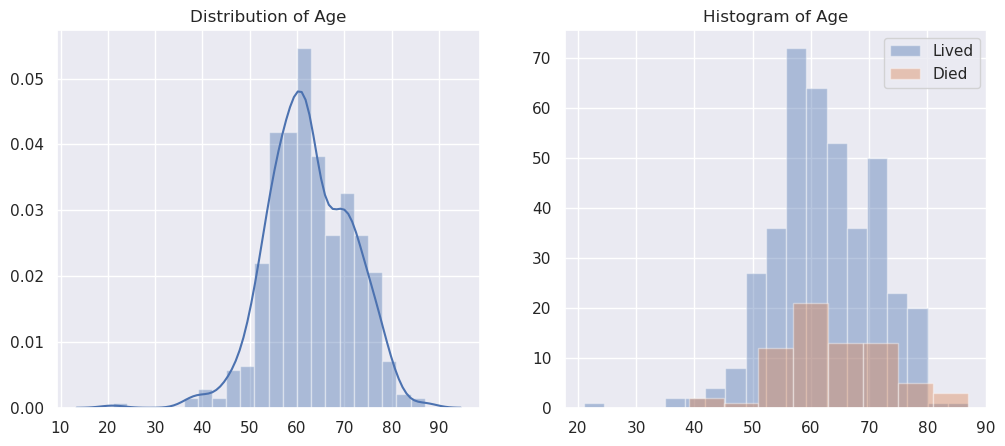

In [7]:
plot_distributions(thoracic, 'Age')

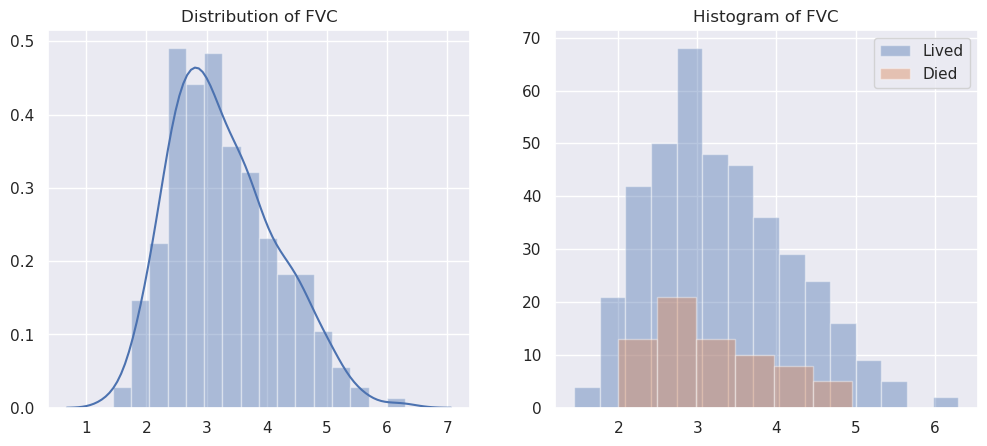

In [8]:
plot_distributions(thoracic, 'FVC')

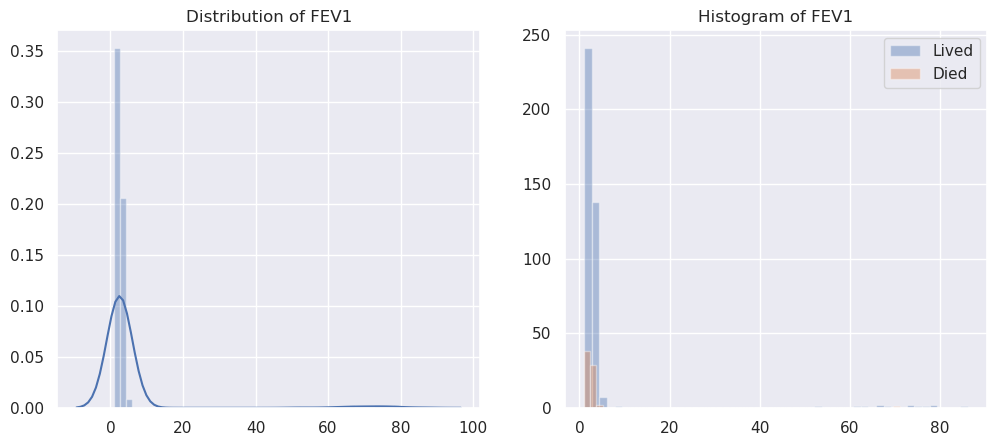

In [9]:
plot_distributions(thoracic, 'FEV1')

Do we have some outliers in `FEV1`?

In [10]:
f = thoracic.FEV1 > (thoracic.FEV1.mean() + 2 * thoracic.FEV1.std())
display(thoracic[f].describe())
display(thoracic[~f].describe())

,FVC,FEV1,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Type2Diabetes,MI,PAD,Smoking,Asthma,Age,Risk1Yr
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.0,14.000000,14.0,14.0,14.000000,14.0,14.000000,14.000000
mean,3.158571,71.000000,0.285714,0.357143,0.428571,0.428571,0.0,0.071429,0.0,0.0,0.642857,0.0,57.714286,0.071429
std,0.899092,8.598837,0.468807,0.497245,0.513553,0.513553,0.0,0.267261,0.0,0.0,0.497245,0.0,9.335034,0.267261
min,1.820000,52.300000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,38.000000,0.000000
25%,2.577500,66.625000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,54.250000,0.000000
50%,2.940000,71.950000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.0,60.000000,0.000000
75%,3.677500,76.600000,0.750000,1.000000,1.000000,1.000000,0.0,0.000000,0.0,0.0,1.000000,0.0,61.750000,0.000000
max,5.030000,86.300000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,0.0,1.000000,0.0,75.000000,1.000000


,FVC,FEV1,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Type2Diabetes,MI,PAD,Smoking,Asthma,Age,Risk1Yr
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,3.285417,2.529145,0.059211,0.138158,0.054825,0.695175,0.171053,0.074561,0.004386,0.017544,0.826754,0.004386,62.682018,0.151316
std,0.871273,0.820808,0.236278,0.345445,0.227888,0.460839,0.376969,0.262971,0.066154,0.131430,0.378875,0.066154,8.655417,0.358750
min,1.440000,0.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,2.600000,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,3.160000,2.360000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,3.840000,2.985000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,6.300000,8.560000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


Now, plot these two revised data set distributions.

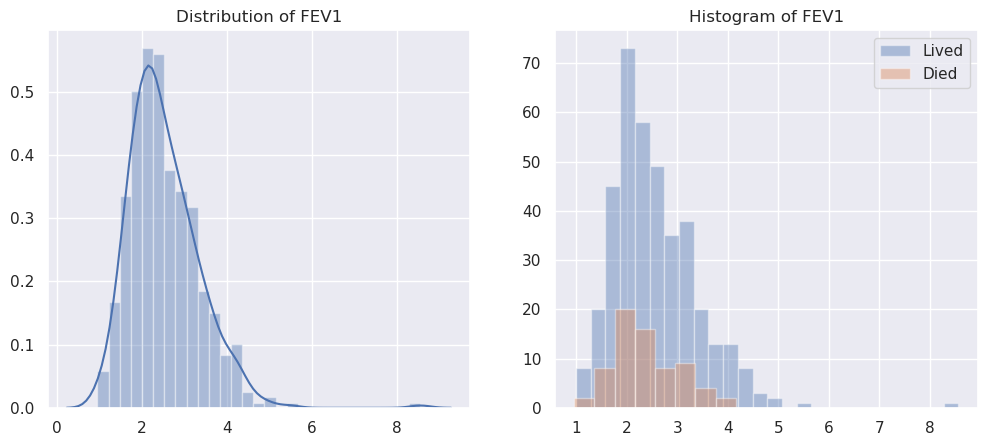

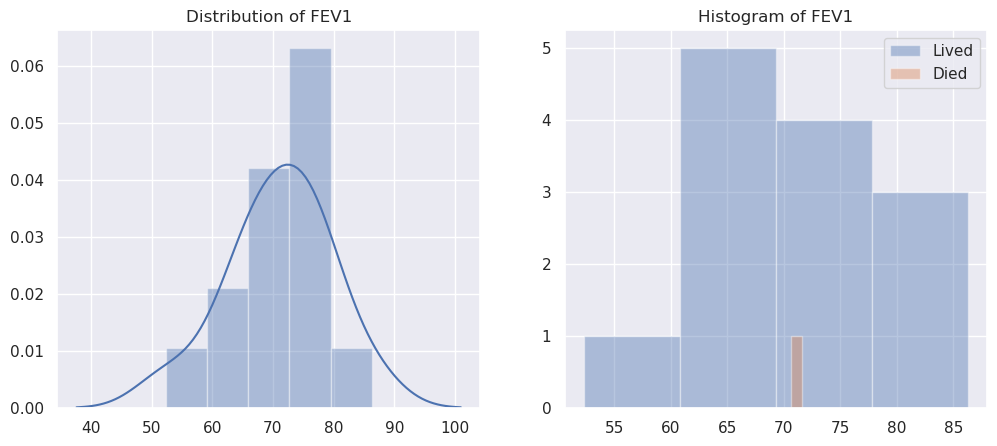

In [11]:
plot_distributions(thoracic[~f], 'FEV1')
plot_distributions(thoracic[f], 'FEV1')

I personally feel that it's clear that these 14 data points are off by an order of magnitude and that I'm justified in dividing them by 10.0 and I will make that modification and replot.

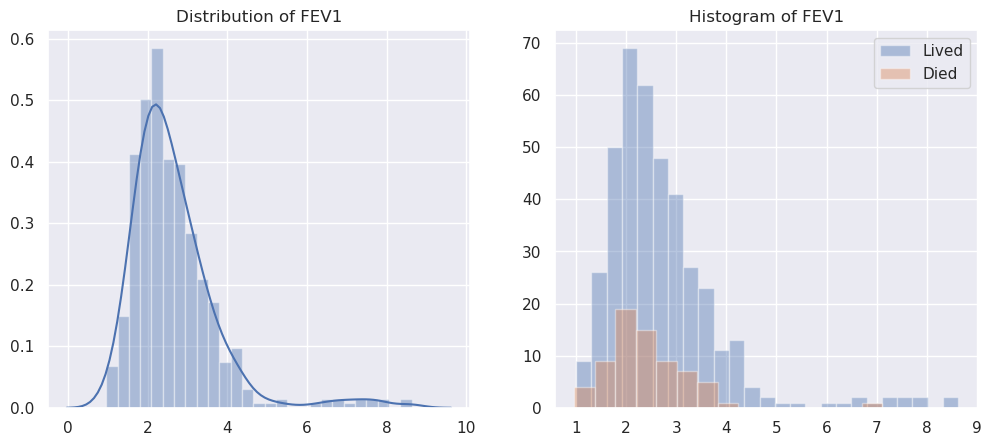

In [12]:
thoracic_new = thoracic.copy()
thoracic_new.loc[f, 'FEV1'] = thoracic_new.loc[f, 'FEV1'] / 10.0
plot_distributions(thoracic_new, 'FEV1')

Looking at the distributions of `FEV1` and `FVC` we would probably be justified with performing a log transform of that data to make it more normally distributed. Let's perform this transformation on `FEV1` for illustrative purposes, but we will just keep this idea in our back pocket to be used if needed.

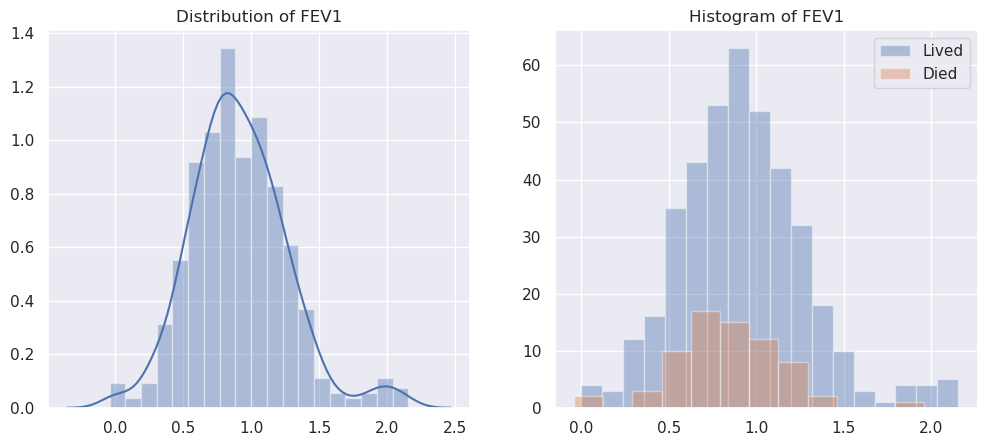

In [15]:
temp = thoracic_new.copy()
temp.loc[:, 'FEV1'] = np.log(temp.FEV1)
plot_distributions(temp, 'FEV1')

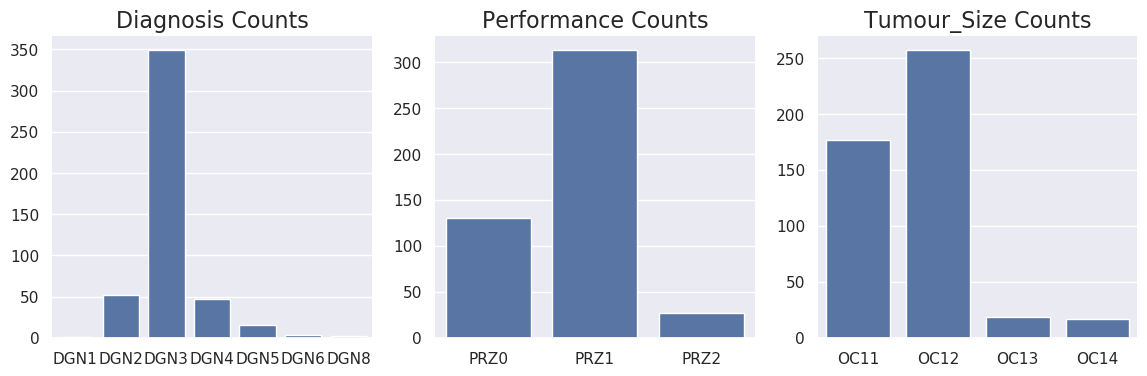

In [16]:
def display_values(df, col, ax, title = 'Value Counts', hue = None):
    if hue is None:
        sns.countplot(data = df, x = col, ax = ax, color = sns.color_palette()[0])
    else:
        sns.countplot(data = df, x = col, ax = ax, hue = hue)
    ax.set_title(title, size = 16)
    ax.set_ylabel('')
    ax.set_xlabel('')
    sns.despine(left = True)
    
with sns.axes_style('darkgrid'):
    fig, axs = plt.subplots(1, 3, figsize = (14, 4))
    for ax, col in zip(axs, cats_cols):
        display_values(thoracic, col, ax, title = col + ' Counts')
    plt.show()

Well, our categorical predictors are very imbalanced.

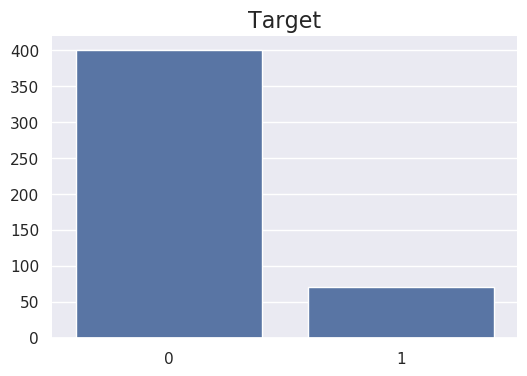

In [17]:
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots()
    display_values(thoracic, 'Risk1Yr', title = 'Target', ax = ax)
    plt.show()

We see that the target variable is also imbalanced.

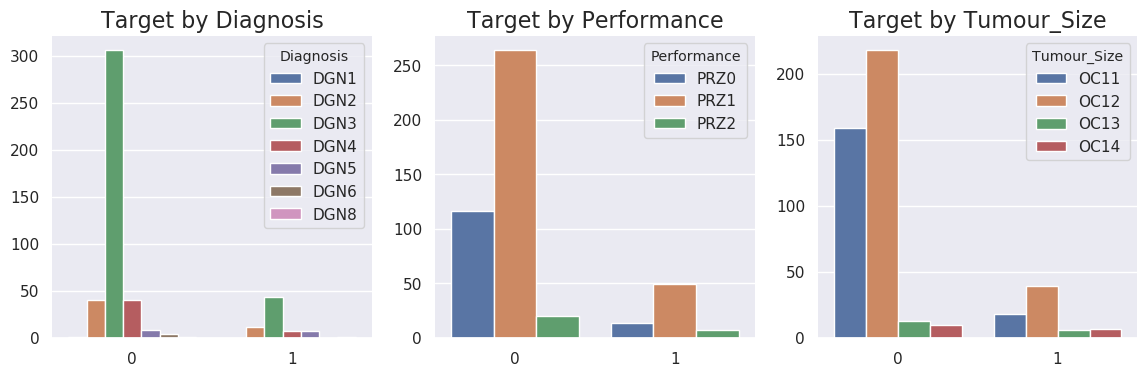

In [18]:
 with sns.axes_style('darkgrid'):
    fig, axs = plt.subplots(1, 3, figsize = (14, 4))
    for ax, col in zip(axs, cats_cols):
        display_values(thoracic, 'Risk1Yr', ax, title = 'Target by ' + col, hue = col)
    plt.show()

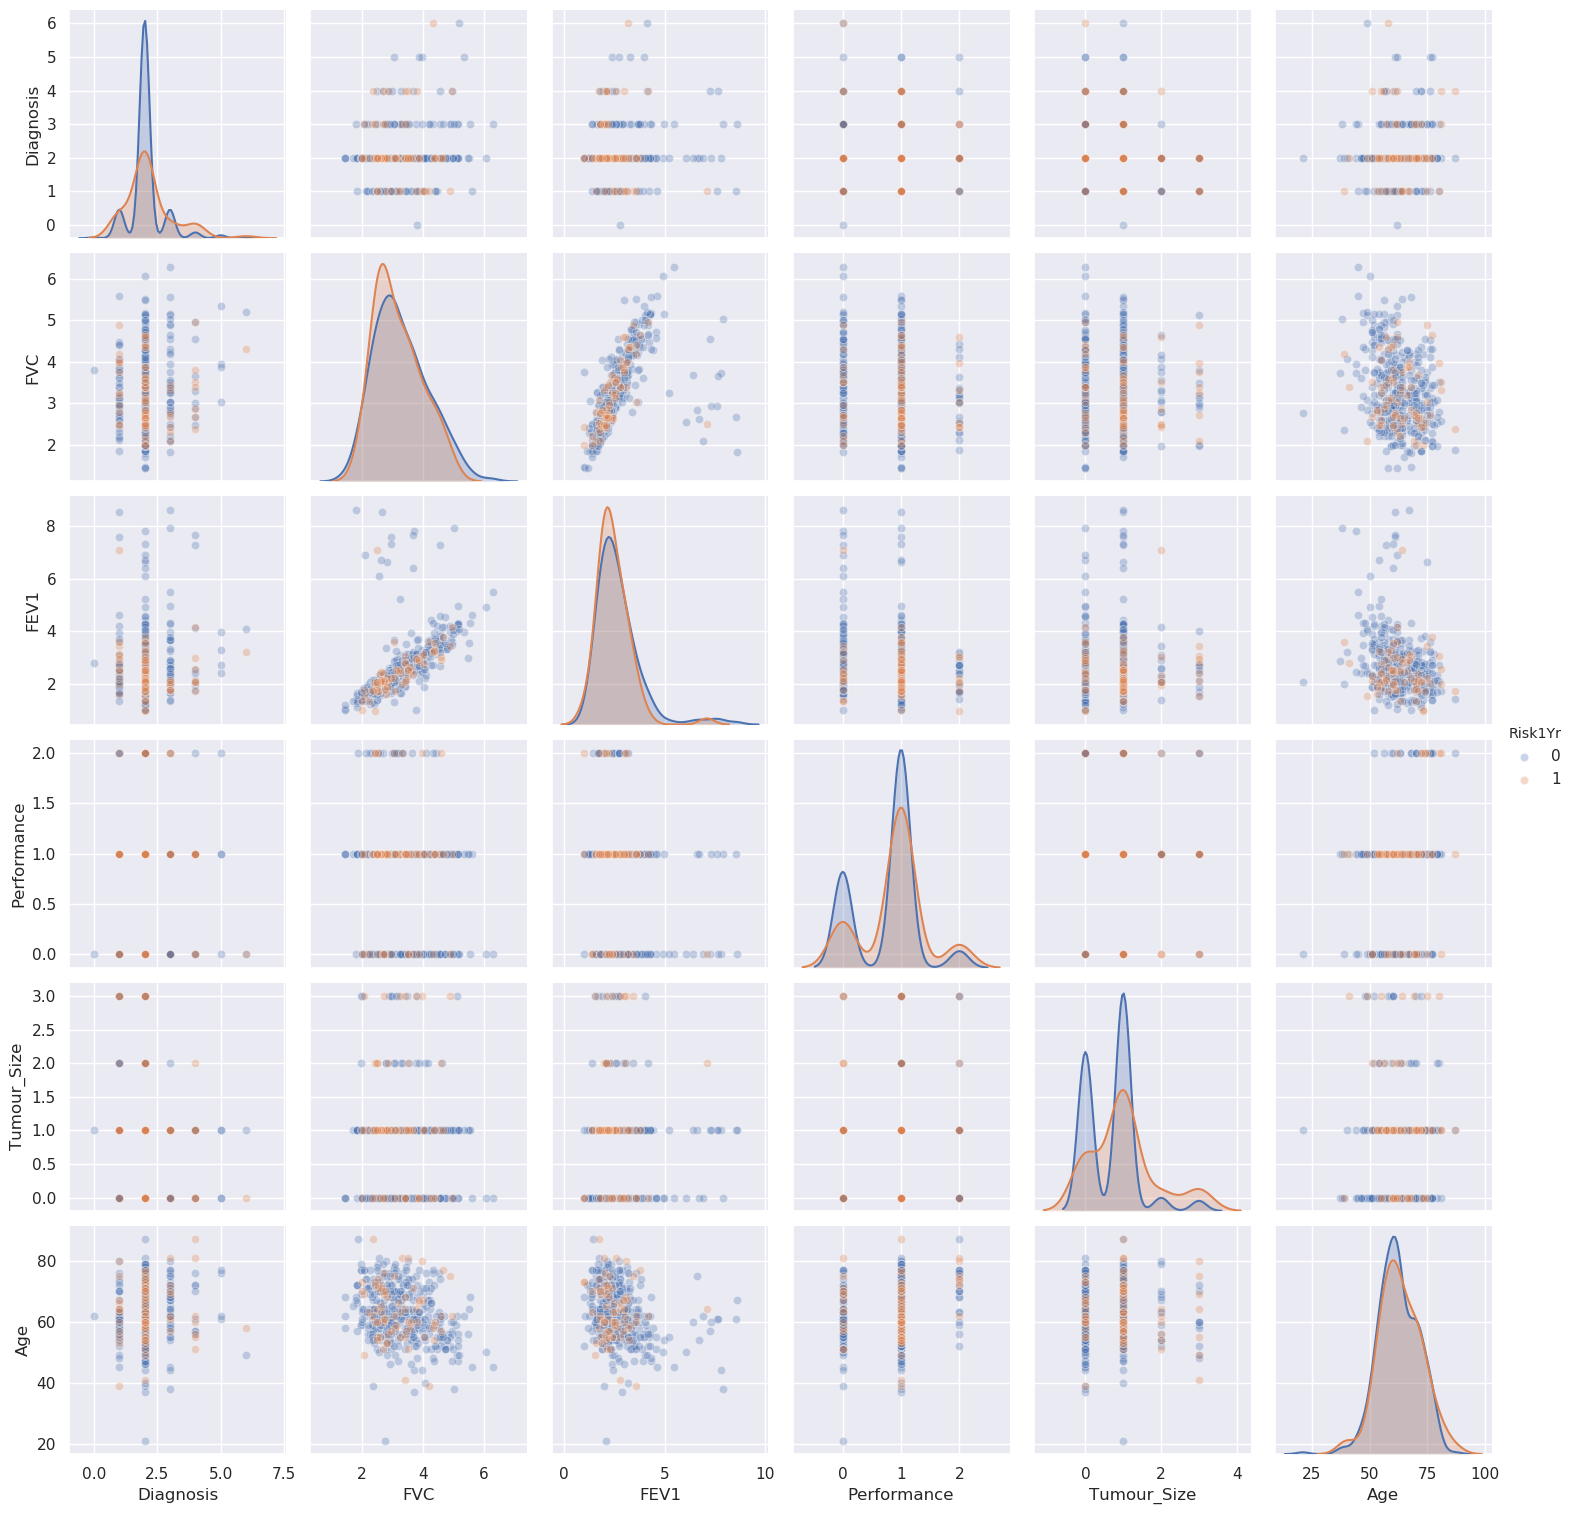

In [19]:
# apply some label encoding before we perform the scatterplot
temp = thoracic_new.copy()
temp.loc[:, cats_cols] = temp.loc[:, cats_cols].apply(LabelEncoder().fit_transform)

cols = ['Diagnosis', 'FVC', 'FEV1', 'Performance', 'Tumour_Size', 'Age', 'Risk1Yr']
sns.pairplot(data = temp[cols], hue = 'Risk1Yr', plot_kws = {'alpha': 0.3})
plt.show()

Now it looks like there is a consistent group of outliers and maybe my simple division by 10.0 isn't a solution. Let's group those points and perform the same scatterplot.

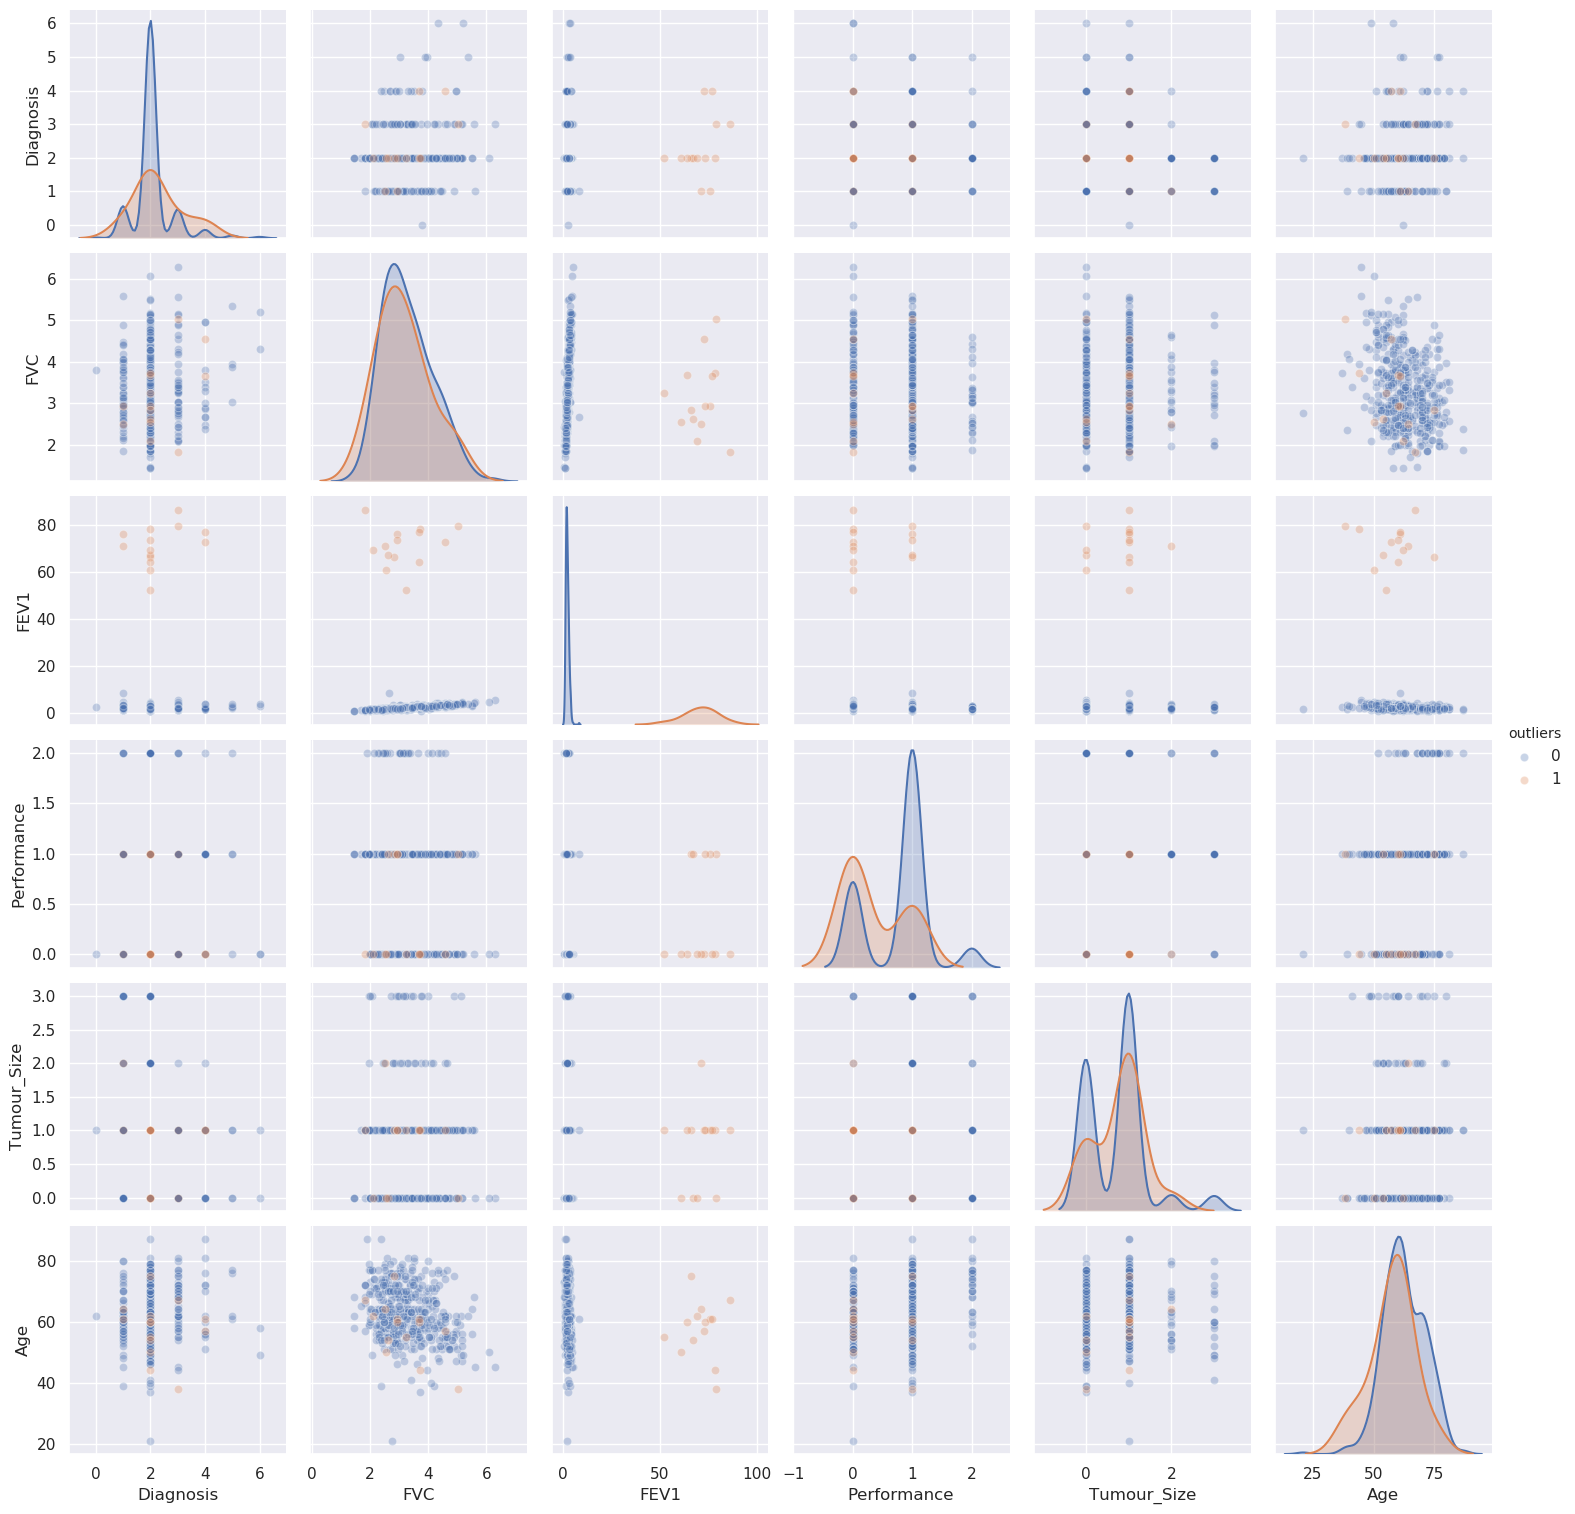

In [20]:
f = thoracic.FEV1 > (thoracic.FEV1.mean() + 2 * thoracic.FEV1.std())
temp = thoracic.copy()
temp['outliers'] = 0
temp.loc[f, 'outliers'] = 1

# apply some label encoding before we perform the scatterplot
temp.loc[:, cats_cols] = temp.loc[:, cats_cols].apply(LabelEncoder().fit_transform)

cols = ['Diagnosis', 'FVC', 'FEV1', 'Performance', 'Tumour_Size', 'Age', 'outliers']
sns.pairplot(data = temp[cols], hue = 'outliers', plot_kws = {'alpha': 0.3})
plt.show()

And, if we remove these outliers

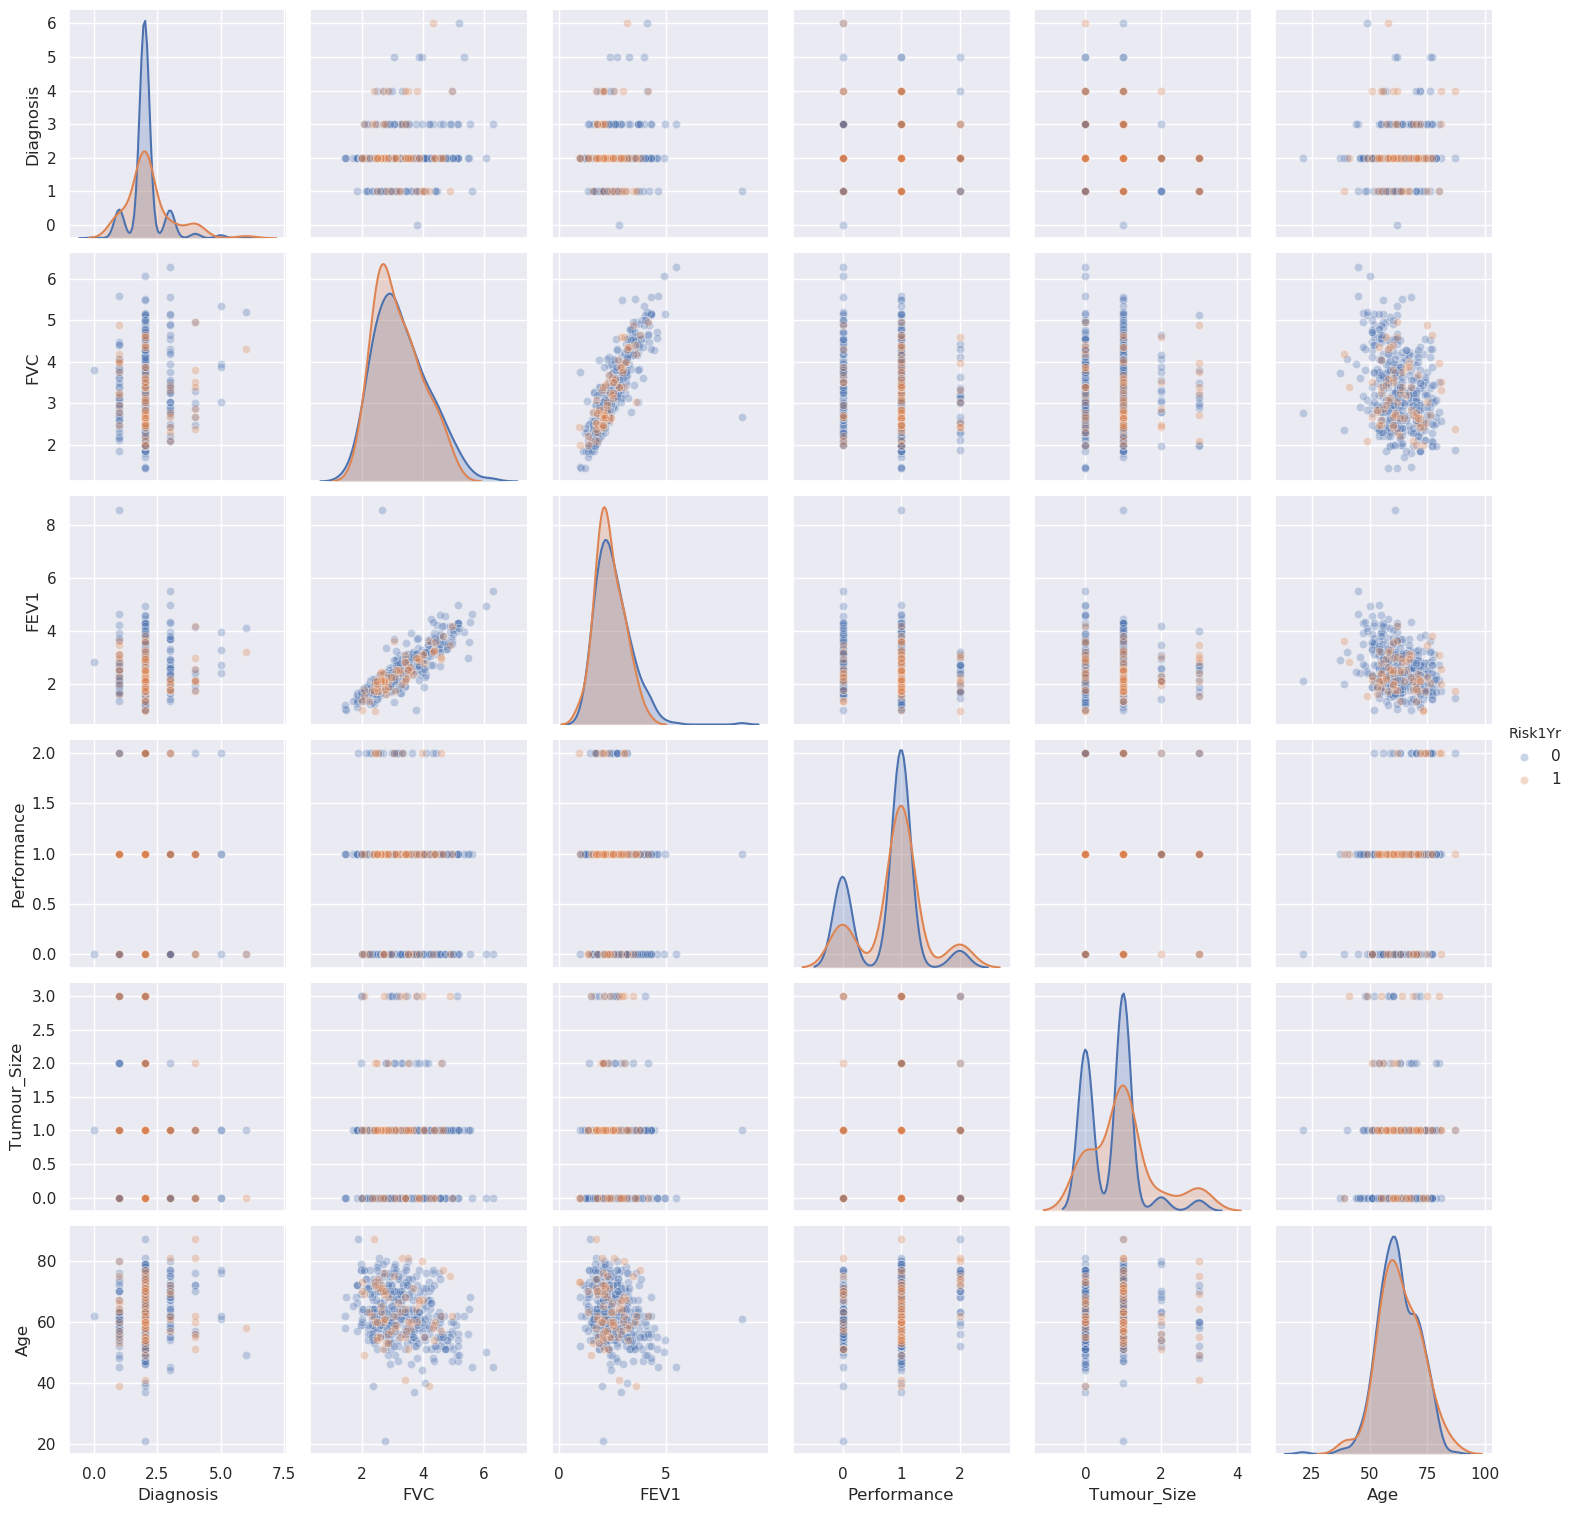

In [21]:
cols = ['Diagnosis', 'FVC', 'FEV1', 'Performance', 'Tumour_Size', 'Age', 'Risk1Yr']
sns.pairplot(data = temp.loc[temp.outliers == 0, cols], hue = 'Risk1Yr', plot_kws = {'alpha': 0.3})
plt.show()

It looks like we still have one more outlier that we should remove as per the following plots.

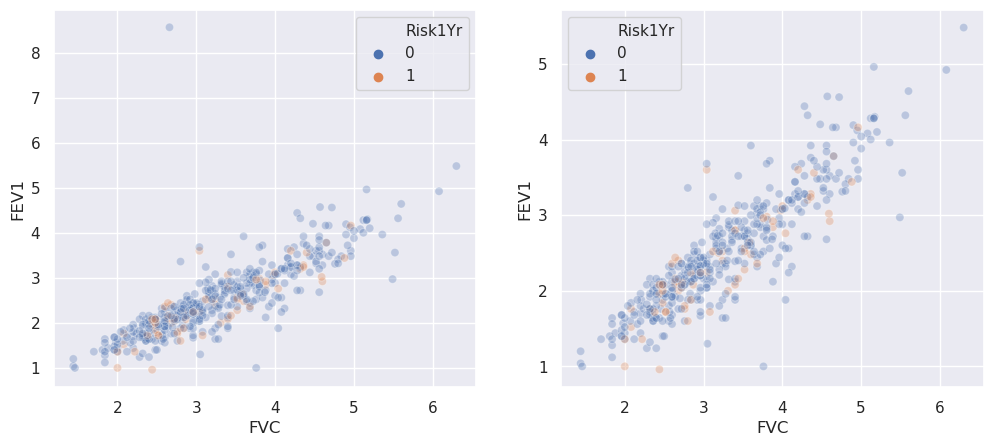

In [22]:
fig, axs = plt.subplots(1, 2, figsize = (12, 5))
sns.scatterplot(data = temp.loc[temp.outliers == 0, cols], x = 'FVC', y = 'FEV1', hue = 'Risk1Yr', alpha = 0.3, ax = axs[0])
sns.scatterplot(data = temp.loc[temp.FEV1 <= 7, cols], x = 'FVC', y = 'FEV1', hue = 'Risk1Yr', alpha = 0.3, ax = axs[1])
plt.show()

We can now create the final dataset to use for analysis and look at the descriptive statistics for it.

In [23]:
thoracic_final = thoracic[(thoracic.FEV1 <= 7) & (thoracic.Age > 30)].copy()
display(thoracic_final.head(3))
display(thoracic_final.describe())

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumour_Size,Type2Diabetes,MI,PAD,Smoking,Asthma,Age,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,0,0,0,1,1,OC14,0,0,0,1,0,60.0,0
1,DGN3,3.40,1.88,PRZ0,0,0,0,0,0,OC12,0,0,0,1,0,51.0,0
2,DGN3,2.76,2.08,PRZ1,0,0,0,1,0,OC11,0,0,0,1,0,59.0,0


,FVC,FEV1,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Type2Diabetes,MI,PAD,Smoking,Asthma,Age,Risk1Yr
count,454.000000,454.00000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,3.287952,2.51685,0.059471,0.136564,0.055066,0.696035,0.171806,0.074890,0.004405,0.017621,0.828194,0.004405,62.777533,0.151982
std,0.872347,0.77189,0.236766,0.343765,0.228361,0.460475,0.377628,0.263504,0.066299,0.131715,0.377628,0.066299,8.449634,0.359400
min,1.440000,0.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000
25%,2.600000,1.96000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,3.160000,2.36000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,3.840000,2.97750,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,6.300000,5.48000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


### Results of EDA

Some outliers were detected and removed and hopefully this will be useful in the further analysis. At the present time though, I have not found anything that seems to be incredibly useful for predicting the `Risk1Yr`. A lot of work left to find a useful predictive assocation.

### Statistics

As this dataset is relatively small and is dominated by quantitative variables I wanted to look at some $\chi^2$ statistics and use them to reduce the feature set.


The following cell is just here to learn a little pandas crosstab goodness as I was figuring out how to do some $\chi^2$ tests. Please ignore it.

In [24]:
# these are actually some contingency tables which we could perform some statistics on
# fun stuff - let's do it.

xtabs = {
    'Diagnosis': pd.crosstab(thoracic_final.Diagnosis, thoracic_final.Risk1Yr),
    'Performance': pd.crosstab(thoracic_final.Performance, thoracic_final.Risk1Yr, margins = False),
    'Tumour_Size': pd.crosstab(thoracic_final.Tumour_Size, thoracic_final.Risk1Yr),
}

#display(xtabs['Diagnosis'])
#display(xtabs['Performance'])
#display(xtabs['Tumour_Size'])

chi2, p, dof, ex = stats.chi2_contingency(xtabs['Diagnosis'])
print(chi2, p, dof)

chi2, p, dof, ex = stats.chi2_contingency(xtabs['Performance'],correction = False)
print(chi2, p, dof)

chi2, p, dof, ex = stats.chi2_contingency(xtabs['Tumour_Size'])
print(chi2, p, dof)

21.56174755753648 0.001453345833174679 6
4.32336098194853 0.11513148096382131 2
14.27811572182273 0.0025500230188608528 3


Calculating the $\chi^2$ for Performance by hand after getting the contingency table.

In [25]:

# o = np.array([116, 14, 264, 49, 20,7]).reshape(3,2)
# e = np.array([110.64, 19.36, 266.38, 46.62, 22.98, 4.02]).reshape(3,2)
# c = np.sum((o-e)**2 / e)
# o, e, (o-e)**2, c
# #c

Now that I have a better understanding of how to work with $\chi^2$ in python I want to run $\chi^2$ independence tests between each of the categorical columns and the Target variable and get a list of columns with $p <= 0.05$

In [27]:
from pprint import pprint

chi_cols = set(thoracic_final.columns) - {'FVC', 'FEV1', 'Age', 'Risk1Yr'}
chi_p_values = dict()
for c in chi_cols:
    contingency_table = pd.crosstab(thoracic_final[c], thoracic_final.Risk1Yr)
    chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
    chi_p_values[c] = p

# raised alpha slightly higher than 0.05 to caputre Cough as it is very close to our threshold and deserves to be included.
ALPHA = 0.08 
chi_cols = [k for k, p in chi_p_values.items() if p <= ALPHA]

pprint(chi_p_values)
pprint(chi_cols)

{'Asthma': 0.6987774213769404,
 'Cough': 0.06578584486947665,
 'Diagnosis': 0.001453345833174679,
 'Dyspnoea': 0.03394524270723102,
 'Haemoptysis': 0.12062046517480957,
 'MI': 0.6987774213769404,
 'PAD': 0.7776938357826876,
 'Pain': 0.18528225582859145,
 'Performance': 0.11513148096382131,
 'Smoking': 0.13125507978253642,
 'Tumour_Size': 0.0025500230188608528,
 'Type2Diabetes': 0.03140867145159752,
 'Weakness': 0.10741202272668042}
['Tumour_Size', 'Type2Diabetes', 'Diagnosis', 'Dyspnoea', 'Cough']


## Machine Learning

Let's start off by defining a number of helper functions and visualizations that we will use throughout this section as we explore various models.

In [28]:
def evaluate_text(y_true, y_pred, y_proba):
    print(f'accuracy = {accuracy_score(y_true, y_pred):.3f}')
    print(f'precision = {precision_score(y_true, y_pred):.3f}')
    print(f'recall = {recall_score(y_true, y_pred):.3f}')

def visualize_confusion_matrix(y_true, y_predict):
    # Construct the confusion matrix using the predicted and actual labels
    cm = confusion_matrix(y_true, y_predict)
    C_df = pd.DataFrame(cm,
                        index= ['Live', 'Die'],
                        columns= ['Live', 'Die'])

    fig, ax = plt.subplots(figsize = (2.5, 2.5))
    sns.heatmap(C_df, 
                cmap = 'Blues', cbar = False,
                annot = True, fmt = 'd', annot_kws={"fontsize":12},
                #ax = ax)
               )
    ax.tick_params(labelsize = 14, which = 'both')
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    

def plot_intersection(x, y):
    plt.plot([0, x], [y, y], 'r:')
    plt.plot([x, x], [0, y], 'r:')
    plt.plot([x], [y], 'ro')
    plt.annotate(xy=(x + 0.01, y), s=f'({x:.2f}, {y:.2f})', c='r')


def plot_precision_vs_recall(precisions, recalls, precision, recall):
    # adapted from:
    # Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn,
    #     Keras, and TensorFlow, 2nd Edition. O'Reilly Media, Inc.
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.title("Precision vs Recall Curve", size = 20)
    ax.tick_params(labelsize = 14)
    plt.axis([0, 1.01, 0, 1.01])
    plt.grid(True)
    plot_intersection(recall, precision)
    
    
def plot_roc_curve(fprs, tprs, fpr, tpr, label = None):
    # adapted from:
    # Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn,
    #     Keras, and TensorFlow, 2nd Edition. O'Reilly Media, Inc.
    plt.plot(fprs, tprs, "b-", linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate (1 - Specivity)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16) 
    plt.title("ROC Curve", size = 20)
    plt.tick_params(labelsize = 14)
    plt.axis([-0.01, 1.01, 0, 1.01])
    plt.grid(True)
    plot_intersection(fpr, tpr)

    
def evaluate_model(X, y_true, y_pred, y_prob):
    evaluate_text(y_true, y_pred, y_prob)
    visualize_confusion_matrix(y_true, y_pred)
    
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_prob[:, 1])

    fig, ax = plt.subplots(figsize=(7,4))
    plot_precision_vs_recall(precisions, 
                             recalls, 
                             precision_score(y_true, y_pred),
                             recall_score(y_true, y_pred))
    
    fprs, tprs, thresholds = roc_curve(y_true, y_prob[:, 1])
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    fpr = fp / (fp + tn)

    fig, ax = plt.subplots(figsize=(7,4))
    plot_roc_curve(fprs, tprs, fpr, recall_score(y_true, y_pred))
    
def plot_feature_importances(rf, cols, dataset_name = None):
    importances = rf.feature_importances_
    n = len(importances)
    if len(importances) > 10:
        n = 10
    indices = np.argsort(rf.feature_importances_)
    with sns.axes_style('whitegrid'):
        sns.barplot(y = np.array(cols)[indices][-n:][::-1], 
                    x = sorted(importances)[-n:][::-1], 
                    color = sns.color_palette('pastel')[0] )
        sns.despine()
        if dataset_name is None:
            title = "Feature Importances"
        else:
            title = f"Feature Importances ({dataset_name})"
        plt.title(title, size = 18)

        
def plot_precision_recall_vs_threshold(y_true, 
                                       y_scores, 
                                       xlabel = None, 
                                       title = "Precision Recall Tradeoff"):
    precision, recalls, thresholds = precision_recall_curve(y_true, y_scores)
    plt.plot(thresholds, precision[:-1], 'b--', label="Precision")
    plt.plot(thresholds, recalls[:-1], 'g-', label="Recall")
    plt.xlabel(xlabel, size = 14)
    plt.title(title, size = 18)
    plt.legend()

   
        
def thoracic_X_y(thoracic):
    X = thoracic.drop(columns=['Risk1Yr'])
    X.loc[:, cats_cols] = X.loc[:, cats_cols].apply(LabelEncoder().fit_transform)
    y = thoracic.Risk1Yr
    
    return X, y

Need to split into train, validation and test sets.

In [29]:
train_df, test_df = train_test_split(thoracic_final, test_size = 0.2, random_state = 42, stratify = thoracic_final.Risk1Yr)
train_df, val_df = train_test_split(train_df, test_size = 0.2, random_state = 42, stratify = train_df.Risk1Yr)

X_train, y_train = thoracic_X_y(train_df)
X_test, y_test = thoracic_X_y(test_df)
X_val, y_val = thoracic_X_y(val_df)

I will construct two data pipelines, one for the fullset and one for the reduced set.

In [30]:
num_cols = ['FVC', 'FEV1', 'Age']
selected_features = chi_cols + num_cols

display(thoracic_final.head(1))
thoracic_final[selected_features].head(1)
display(thoracic_final[selected_features].describe())

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumour_Size,Type2Diabetes,MI,PAD,Smoking,Asthma,Age,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,0,0,0,1,1,OC14,0,0,0,1,0,60.0,0


,Type2Diabetes,Dyspnoea,Cough,FVC,FEV1,Age
count,454.000000,454.000000,454.000000,454.000000,454.00000,454.000000
mean,0.074890,0.055066,0.696035,3.287952,2.51685,62.777533
std,0.263504,0.228361,0.460475,0.872347,0.77189,8.449634
min,0.000000,0.000000,0.000000,1.440000,0.96000,37.000000
25%,0.000000,0.000000,0.000000,2.600000,1.96000,57.000000
50%,0.000000,0.000000,1.000000,3.160000,2.36000,62.000000
75%,0.000000,0.000000,1.000000,3.840000,2.97750,69.000000
max,1.000000,1.000000,1.000000,6.300000,5.48000,87.000000


In [31]:
from sklearn.base import BaseEstimator, TransformerMixin

class HackedLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.label_encoders = {}
        pass
        
    def fit(self, X, y=None):
        for c in X.columns:
            le = LabelEncoder()
            le.fit(X[c])
            self.label_encoders[c] = le
        return self
    
    def transform(self, X, y=None):
        for c in X.columns:
            X.loc[:, c] = self.label_encoders[c].transform(X[c])
        return X

In [32]:
nothing_cols
chi_pipe_cols

NameError: name 'nothing_cols' is not defined

In [ ]:
def do_nothing(X):
    return X

num_cols = ['FVC', 'FEV1', 'Age']
cat_cols = ['Diagnosis', 'Performance', 'Tumour_Size']
cat_cols_chi = ['Diagnosis', 'Tumour_Size']
selected_features = chi_cols + num_cols
nothing_cols = [c for c in selected_features if c not in num_cols + cat_cols_chi]

# for random forest we will label encode rather than one hot encode
full_pipe_rf = ColumnTransformer([
    ('scale', StandardScaler(), num_cols),
    ('cat', HackedLabelEncoder(), cat_cols),
], remainder = 'passthrough')

full_pipe = ColumnTransformer([
    ('scale', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols),
], remainder = 'passthrough')

# the chi column transformers need something else as a number of columns will be deleted that should be kept
chi_pipe_rf = ColumnTransformer([
    ('scale', StandardScaler(), num_cols),
    ('cat', HackedLabelEncoder(), cat_cols_chi),
    ('nothing', FunctionTransformer(do_nothing), nothing_cols),
])

chi_pipe = ColumnTransformer([
    ('scale', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols_chi),
    ('nothing', FunctionTransformer(do_nothing), nothing_cols),
])

# now lets create lists of columns names to be able to convert these into pretty dataframes
full_pipe_cols = (num_cols + cat_cols + 
                     [col for col in X_train.columns 
                      if col not in num_cols + cat_cols])
chi_pipe_cols = (num_cols + cat_cols_chi + nothing_cols)

In [ ]:
# debugging purposes

# display(X_train.head())
# print(num_cols, cat_cols)
# display(pd.DataFrame(full_pipe_rf.fit_transform(X_train), columns = full_pipe_cols))
# display(pd.DataFrame(chi_pipe_rf.fit_transform(X_train), columns = chi_pipe_cols))


Now we are ready to create the first simple classifier to use as a baseline. For this we will use a Random Forest Classifier.

In [ ]:
rfs = []
for p in [full_pipe_rf, chi_pipe_rf]:
    rf = RandomForestClassifier(n_estimators = 1000, 
                                n_jobs = -1, 
                                class_weight='balanced', )
    data = p.fit_transform(X_train)
    display(pd.DataFrame(data).head())
    rfs.append(rf.fit(data, y_train))

In [ ]:
for r, c in zip(rfs, [full_pipe_cols, chi_pipe_cols]):
    plot_feature_importances(r, c, "balanced_subsample")
    plt.show()

In [ ]:
val_data = full_pipe_rf.transform(X_val)
y_prob = rfs[0].predict_proba(val_data)
plot_precision_recall_vs_threshold(y_val, y_prob[:, 1], "Probability")

In [ ]:
val_data = chi_pipe_rf.transform(X_val)
y_prob = rfs[1].predict_proba(val_data)
plot_precision_recall_vs_threshold(y_val, y_prob[:, 1], "Probability")

In [ ]:
val_data = full_pipe_rf.transform(X_val)
y_prob = rfs[0].predict_proba(val_data)
y_pred = y_prob[:, 1] > 0.15
evaluate_model(X_val, y_val, y_pred, y_prob)

---
We are doing really poorly with our model. I've never seen an ROC curve like that at all.

---

Now, let's look at just using the numeric features and the $\chi^2$ features.


In [ ]:
val_data = chi_pipe_rf.transform(X_val)
y_prob = rfs[1].predict_proba(val_data)
y_pred = y_prob[:, 1] > 0.15
evaluate_model(X_val, y_val, y_pred, y_prob)

So, less features is doing better but it is still horrible.

We will try a support vector machine as they apparently perform decently with imbalanced data. The problem is I have no idea what are decent values for the parameters so we will definitely have to do a `RandomSearchCV`.

In [ ]:
svc = SVC(gamma = 5, C = 0.001, probability = True, class_weight='balanced')
scaler = StandardScaler().fit(X_train)
#_ = svc.fit(scaler.transform(X_train), y_train)

In [ ]:
svc_params = {
    'gamma': stats.reciprocal(a=1e-7, b = 1e2),
    'C': stats.reciprocal(a = 1e-4, b = 1e4),
}

from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(svc, 
                        param_distributions=svc_params,
                        n_iter = 1000,
                        cv = 5,
                        n_jobs = -1,
                        scoring = 'roc_auc',
                        verbose = 10,
                       )
rs.fit(scaler.transform(X_train), y_train)

In [ ]:
rs.best_estimator_

In [ ]:
y_prob = rs.best_estimator_.predict_proba(scaler.transform(X_val))
y_dec = rs.best_estimator_.decision_function(scaler.transform(X_val))
y_pred = y_dec <= -0.70
evaluate_model(X_val[features], y_val, y_pred, y_prob)

In [ ]:
def plot_precision_recall_vs_threshold(y_true, y_scores):
    precision, recalls, thresholds = precision_recall_curve(y_true, y_scores)
    plt.plot(thresholds, precision[:-1], 'b--', label="Precision")
    plt.plot(thresholds, recalls[:-1], 'g-', label="Recall")
    plt.legend()

plot_precision_recall_vs_threshold(y_val, y_dec)
#y_dec[:100]

Now, let's do some downsampling.

In [ ]:
thoracic_train, thoracic_test = train_test_split(thoracic, test_size = 0.30, stratify = thoracic.Risk1Yr)

In [ ]:


thoracic_minority = thoracic_train[thoracic_train.Risk1Yr == 1]
thoracic_majority = thoracic_train[thoracic_train.Risk1Yr == 0]

thoracic_down = resample(thoracic_majority, 
                         replace = True,
                         n_samples = len(thoracic_minority), 
                         random_state = 42)
thoracic_up   = resample(thoracic_minority, 
                         replace = True,
                         n_samples = len(thoracic_majority), 
                         random_state = 42)

X, y = thoracic_X_y(
    shuffle(pd.concat([thoracic_up, thoracic_majority]),
            random_state = 42))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
rf = RandomForestClassifier(n_estimators = 1000)
_ = rf.fit(X_train, y_train)
plot_feature_importances(rf, X, "Downsampled")
print(rf.score(X_test, y_test))
y_pr = rf.predict(X_test)
print(precision_score(y_test, y_pr))
print(confusion_matrix(y_test, y_pr))


In [ ]:
np.sum(rf.predict(X_test)), np.sum(y_test)

In [ ]:
np.sum(y)

In [ ]:
len(thoracic_majority), len(thoracic_minority)

In [ ]:
len(y)

In [ ]:
X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape

In [ ]:
X_hold, y_hold = thoracic_X_y(thoracic_test)
y_pr = rf.predict(X_hold)

In [ ]:
print(precision_score(y_hold, y_pr))
print(confusion_matrix(y_hold, y_pr))


In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_hold, y_pr)

In [ ]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--')

In [ ]:
plot_roc_curve(fpr, tpr)